Task 04: Predicting Insurance Claim Amounts.

Objective:
Estimate the medical insurance claim amount based on persnal data.

Dataset:
Medical Cost Personal Dataset.
About Dataset:
Context:
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.
Content:
Columns:
age: Age of primary beneficiary.
sex: Insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
children: Number of children covered by health insurance / Number of dependents.
smoker: Smoking.
region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health.

Load The Dataset:

In [1]:
import pandas as pd

In [2]:
Dataset = pd.read_csv("insurance.csv")

Data Exploration:

In [3]:
Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
Dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
Dataset.shape

(1338, 7)

In [8]:
Dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
Dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Instructions:
Visualize how BMI, age and smoking status impact insurance charges.

In [10]:
import matplotlib as pyplot
from matplotlib import pyplot as plt

import seaborn as sns

BMI vs Insurance Charges:

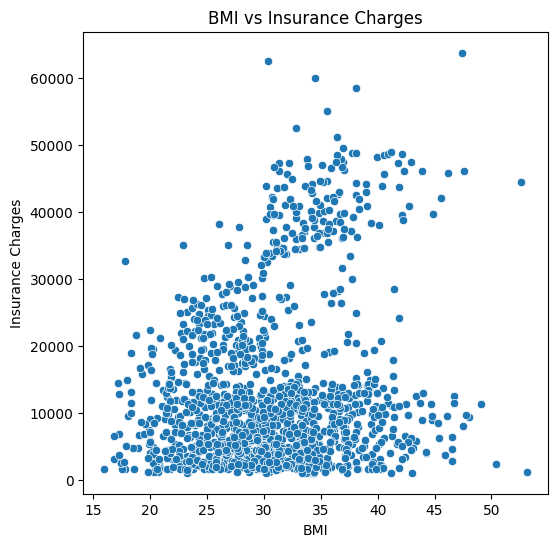

In [11]:
plt.figure(figsize=(6,6))

sns.scatterplot(x=Dataset["bmi"], y=Dataset["charges"])

plt.title("BMI vs Insurance Charges")
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")

plt.show()

Age vs Insurance Charges:

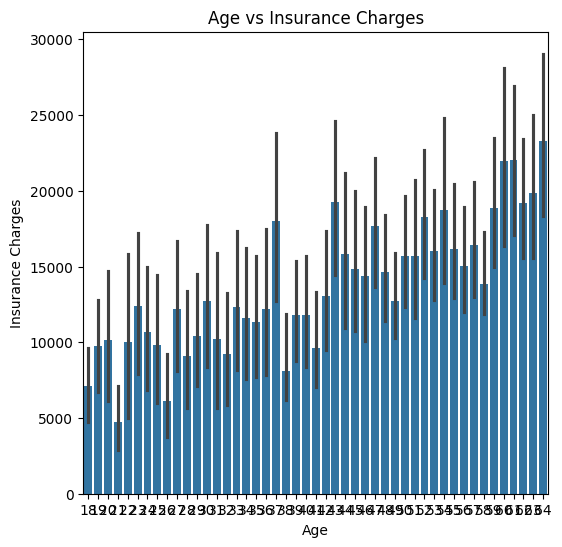

In [12]:
plt.figure(figsize=(6,6))

sns.barplot(x=Dataset["age"], y=Dataset["charges"])

plt.title("Age vs Insurance Charges")
plt.xlabel("Age")
plt.ylabel("Insurance Charges")

plt.show()

Smoking Status vs Insurance Charges:

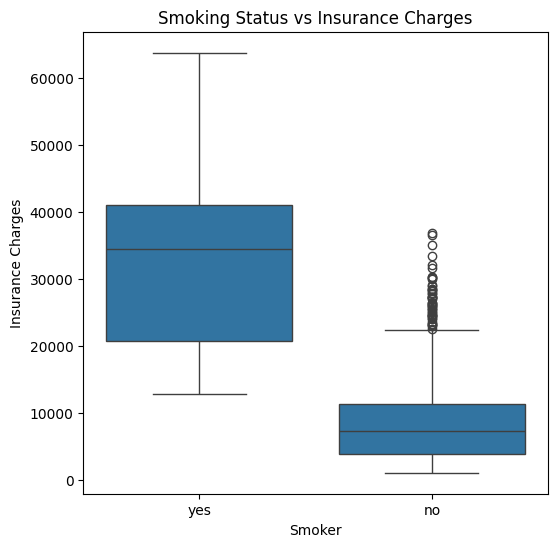

In [13]:
plt.figure(figsize=(6,6))

sns.boxplot(x=Dataset["smoker"], y=Dataset["charges"])

plt.title("Smoking Status vs Insurance Charges")
plt.xlabel("Smoker")
plt.ylabel("Insurance Charges")

plt.show()

PaitPlot For All The Combinations:

<Figure size 600x600 with 0 Axes>

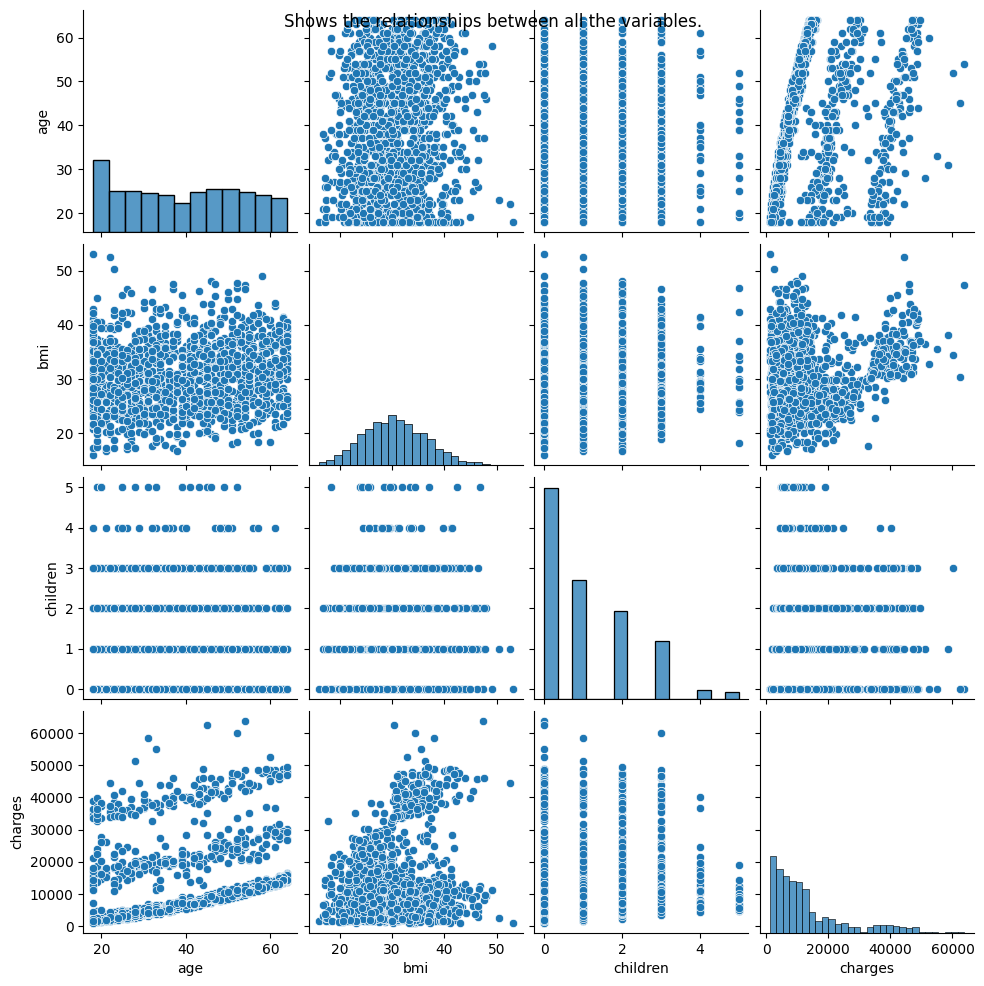

In [14]:
plt.figure(figsize=(6,6))

sns.pairplot(Dataset)

plt.suptitle("Shows the relationships between all the variables.")

plt.show()

Handle Missing values:

In [15]:
Dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
Dataset = pd.get_dummies(Dataset, drop_first=True)

In [17]:
Dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Train a Linear Regression model to predict charges.

In [18]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error

In [19]:
x = Dataset.drop("charges", axis=1)
y = Dataset["charges"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
print("Training Data:", x_train.shape)
print("Testing Data:", x_test.shape)

Training Data: (1070, 8)
Testing Data: (268, 8)


In [22]:
Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)

y_predict_Linear = Linear_model.predict(x_test)

In [23]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Evalute the Model using the MAE RMSE.

Mean Sqaure Error.

In [24]:
print("Mean Squared Error:", mean_squared_error(y_test, y_predict_Linear))

Mean Squared Error: 33596915.851361446


Root Mean Square Error.

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict_Linear))

print("Root Mean Square Error:", rmse)

Root Mean Square Error: 5796.284659276272


In [26]:
comparison = pd.DataFrame({
    "Actual Charges": y_test.values,
    "Predicted Charges": y_predict_Linear})

In [27]:
comparison.head()

,Actual Charges,Predicted Charges
0,9095.06825,8969.550274
1,5272.17580,7068.747443
2,29330.98315,36858.410912
3,9301.89355,9454.678501
4,33750.29180,26973.173457


Skills:
Regression modeling.
Feature correlation and visulaization.
Error model performance using MAE and RMSE.

Task Completed.
Best Wishes.
Zaigham Abbas.